# ***ICPC Dataset***

<img src="https://storage.googleapis.com/kaggle-datasets-images/3081463/5300266/c4bba7d26c06439aaa8997b53d97a80b/dataset-cover.png?t=2023-04-03-05-54-01" alt="Dataset_cover" style="height:450px;">

#### ***By: Amr Sameh Mohamed***
# ***Table of contents***

1. [**Introduction**](#1)
1. [**Imports**](#2)
1. [**Import Data**](#3)
1. [**Data Understanding**](#4)
    - [**Data Wrangling**](#4.1)
    - [**Exploratory Data Analysis - EDA**](#4.2)
1. [**Data Preparing / Preprocessing**](#5)
1. [**Modeling**](#6)
1. [**Evaluation**](#7)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="1"></a>
# ***1. Introduction***

### **1.1- problem Definition and understanding**
- The ICPC World Finals Ranking Dataset provides information about the performance of teams from different universities around the world which participated in the International Collegiate Programming Contest (ICPC) World Finals from 1999 onwards.
- The ICPC is one of the most prestigious programming competitions in the world, where teams of three students compete to solve algorithmic problems in a time-restricted environment. It is organized by the Association for Computing Machinery (ACM), and the competition has several rounds before the finals, including regional competitions and online contests.

### **1.2- Asking questions**
1. *which country hosts the competition the most*
1. *which university is the most participated in the competition*
1. *what is the avarage number of teams every year*
1. *which university won the gold prize the most*
1. *which university won the silver prize the most*
1. *which university won the bronze prize the most*
1. *what is the avarage score scored by teams*
1. *what is the avarage penatly*
1. *is their a relation between the total number of problems and the score achieved*
1. *is their a relation between the time of competition and the champion*
1. *is their a relation to predict when the competition will be hold*

### **1.3- Target**
- 

<a id="2"></a>
# ***2. Imports***

In [2]:
# Load data and preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
# from sklearn.model_selection import train_test_split # split data
from sklearn.preprocessing import LabelEncoder # encode categorical data
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib inline
# Modeling
# from sklearn.linear_model import LogisticRegression
# Evaluation
# from sklearn.metrics import classification_report
# from sklearn.metrics import roc_curve, roc_auc_score
# needed libraries
from collections import Counter # counting the occurrences

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# set the palette
colors = sns.color_palette("flare")
plt.style.available
plt.style.use('ggplot')

<a id="3"></a>
# ***3. Import Data***

In [4]:
# read data with polars using read_csv()
df = pd.read_csv("icpc-full.csv")

In [5]:
# display the head of the data
df.head()

,Year,Date,Host,City,Venue,Rank,University,Country,Team,Contestant 1,...,Contestant 3,Gold,Silver,Bronze,Honorable,Score,Total,Score Percentage,Penalty,Prize
0,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,1.0,University of Waterloo,Canada,U Waterloo,David Kennedy,...,Viet-Trung Luu,True,False,False,False,6.0,8,0.75,948.0,World Champion
1,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,2.0,Albert-Ludwigs-Universität Freiburg,Germany,Freiburg B Team,NaN,...,NaN,False,True,False,False,6.0,8,0.75,992.0,NaN
2,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,3.0,St. Petersburg Institute of Fine Mechanics & O...,Russia,St. Petersburg IFMO,Alexander Volkov,...,Vladimir Lyovkin,False,False,True,False,6.0,8,0.75,1046.0,NaN
3,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,4.0,University of Bucharest,Romania,UNIBUC Bucharest,NaN,...,NaN,False,False,True,False,6.0,8,0.75,1048.0,NaN
4,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,5.0,Duke University,United States,Duke Blue Devils,NaN,...,NaN,False,False,True,False,6.0,8,0.75,1337.0,NaN


<a id="4"></a>
# ***4. Data Understanding***

<a id="4.1"></a>
## ***4.1. Data Wrangling***

In [6]:
# Set the maximum number of columns to display
pd.options.display.max_columns = None

In [7]:
# data shape
print(f'Rows : {df.shape[0]}, Columns : {df.shape[1]}')

Rows : 2308, Columns : 21


In [8]:
# dataset columns
print(df.columns)

Index(['Year', 'Date', 'Host', 'City', 'Venue', 'Rank', 'University',
       'Country', 'Team', 'Contestant 1', 'Contestant 2', 'Contestant 3',
       'Gold', 'Silver', 'Bronze', 'Honorable', 'Score', 'Total',
       'Score Percentage', 'Penalty', 'Prize'],
      dtype='object')


In [9]:
# show first 5 rows in the data
df.head()

,Year,Date,Host,City,Venue,Rank,University,Country,Team,Contestant 1,Contestant 2,Contestant 3,Gold,Silver,Bronze,Honorable,Score,Total,Score Percentage,Penalty,Prize
0,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,1.0,University of Waterloo,Canada,U Waterloo,David Kennedy,Ondrej Lhotak,Viet-Trung Luu,True,False,False,False,6.0,8,0.75,948.0,World Champion
1,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,2.0,Albert-Ludwigs-Universität Freiburg,Germany,Freiburg B Team,NaN,NaN,NaN,False,True,False,False,6.0,8,0.75,992.0,NaN
2,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,3.0,St. Petersburg Institute of Fine Mechanics & O...,Russia,St. Petersburg IFMO,Alexander Volkov,Matvey Kazakov,Vladimir Lyovkin,False,False,True,False,6.0,8,0.75,1046.0,NaN
3,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,4.0,University of Bucharest,Romania,UNIBUC Bucharest,NaN,NaN,NaN,False,False,True,False,6.0,8,0.75,1048.0,NaN
4,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,5.0,Duke University,United States,Duke Blue Devils,NaN,NaN,NaN,False,False,True,False,6.0,8,0.75,1337.0,NaN


In [10]:
# show last 5 rows in the data 
df.tail()

,Year,Date,Host,City,Venue,Rank,University,Country,Team,Contestant 1,Contestant 2,Contestant 3,Gold,Silver,Bronze,Honorable,Score,Total,Score Percentage,Penalty,Prize
2303,2021,2022-11-10,Bangladesh,Dhaka,International Convention City Bashundhara,126.0,German University in Cairo,Egypt,Treevial,Abdelrahman Selim,Mohamed Khaled,Omar Tarek,False,False,False,True,0.0,12,0.0,0.0,NaN
2304,2021,2022-11-10,Bangladesh,Dhaka,International Convention City Bashundhara,126.0,Syrian Virtual University,Syria,Traitors,Mhd Adel SaadEddin,Salim Shebli,Zaher SaadEddin,False,False,False,True,0.0,12,0.0,0.0,NaN
2305,2021,2022-11-10,Bangladesh,Dhaka,International Convention City Bashundhara,126.0,Universidad Tecnologica de Pereira,Colombia,UTP - Lucas,Jhon Alex Gaviria Tobón,Juan Camilo Palacios Galvis,Yeferson Gaitan Gomez,False,False,False,True,0.0,12,0.0,0.0,NaN
2306,2021,2022-11-10,Bangladesh,Dhaka,International Convention City Bashundhara,126.0,Universidad de Costa Rica,Costa Rica,Chayotes UCR,César Herrera Garro,Kevin Coto,Kevin Rojas,False,False,False,True,0.0,12,0.0,0.0,NaN
2307,2021,2022-11-10,Bangladesh,Dhaka,International Convention City Bashundhara,126.0,University of Chinese Academy of Sciences,China,Retired Masters,Tianle Chen,Xuandeng Fu,Yunhan Shen,False,False,False,True,0.0,12,0.0,0.0,NaN


In [11]:
# show data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2308 entries, 0 to 2307
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              2308 non-null   int64  
 1   Date              2308 non-null   object 
 2   Host              2308 non-null   object 
 3   City              2308 non-null   object 
 4   Venue             2308 non-null   object 
 5   Rank              2265 non-null   float64
 6   University        2308 non-null   object 
 7   Country           2308 non-null   object 
 8   Team              2306 non-null   object 
 9   Contestant 1      1908 non-null   object 
 10  Contestant 2      1908 non-null   object 
 11  Contestant 3      1907 non-null   object 
 12  Gold              2308 non-null   bool   
 13  Silver            2308 non-null   bool   
 14  Bronze            2308 non-null   bool   
 15  Honorable         2308 non-null   bool   
 16  Score             2275 non-null   float64


- ***more than `50%` of columns are catergorical data***

In [12]:
# show a descriptive statistical info of data
df.describe().round(3)

,Year,Rank,Score,Total,Score Percentage,Penalty
count,2308.000,2265.000,2275.000,2308.000,2275.000,2190.000
mean,2011.682,53.217,3.876,11.133,0.349,655.083
std,6.320,33.888,2.226,1.608,0.195,391.896
min,1999.000,1.000,0.000,8.000,0.000,0.000
25%,2007.000,25.000,2.000,10.000,0.200,365.250
50%,2012.000,49.000,4.000,11.000,0.330,638.000
75%,2017.000,78.000,5.000,12.000,0.500,934.500
max,2021.000,139.000,13.000,15.000,1.000,1912.000


In [13]:
# check null values
df.isna().sum()

Year                   0
Date                   0
Host                   0
City                   0
Venue                  0
Rank                  43
University             0
Country                0
Team                   2
Contestant 1         400
Contestant 2         400
Contestant 3         401
Gold                   0
Silver                 0
Bronze                 0
Honorable              0
Score                 33
Total                  0
Score Percentage      33
Penalty              118
Prize               2168
dtype: int64

- ***data in contestant cols can be execluded as it shows the name of the contestants in each team***

In [14]:
# check duplication 
df.duplicated().sum()

0

In [15]:
# data unique values
df.nunique()

Year                  23
Date                  23
Host                  13
City                  22
Venue                 23
Rank                 139
University           568
Country               76
Team                1972
Contestant 1        1600
Contestant 2        1638
Contestant 3        1581
Gold                   2
Silver                 2
Bronze                 2
Honorable              2
Score                 14
Total                  7
Score Percentage      51
Penalty             1079
Prize                 15
dtype: int64

In [16]:
# First 5 unique values and number of unique values for each column
for col in df.columns:
  print(col)
  print(f'First 5 unique values: {df[col].unique()[:5]}')
  print(f'Number of unique values: {df[col].nunique()}\n')

Year
First 5 unique values: [1999 2000 2001 2002 2003]
Number of unique values: 23

Date
First 5 unique values: ['1999-04-11' '2000-03-18' '2001-03-10' '2002-03-23' '2003-03-25']
Number of unique values: 23

Host
First 5 unique values: ['Netherlands' 'United States' 'Canada' 'Czechia' 'China']
Number of unique values: 13

City
First 5 unique values: ['Eindhoven' 'Orlando, FL' 'Vancouver, BC' 'Honolulu, HI'
 'Beverly Hills, CA']
Number of unique values: 22

Venue
First 5 unique values: ['Eindhoven University of Technology' 'Radisson Hotel Universal Orlando'
 'The Westin Bayshore' 'Hilton Hawaiian Village' 'The Beverly Hilton']
Number of unique values: 23

Rank
First 5 unique values: [1. 2. 3. 4. 5.]
Number of unique values: 139

University
First 5 unique values: ['University of Waterloo' 'Albert-Ludwigs-Universität Freiburg'
 'St. Petersburg Institute of Fine Mechanics & Optics'
 'University of Bucharest' 'Duke University']
Number of unique values: 568

Country
First 5 unique values: ['

<a id="4.2"></a>
## ***4.2. Exploratory Data Analysis - EDA***

### **Some visuals**

In [17]:
# create an np array with the host countries  using rank = '1' to avoid duplication
host_countries = df[df.Rank == 1] .iloc[:,[0,2]].values # .iloc[:,[0,2]] select all rows for the first and third col, .values create a np array
country_year_map = dict() # a dict to store the host countries

for year, country in host_countries:    # Iterate through each row of host_countries
    if country in country_year_map:
        country_year_map[country] += 1  # Increment the count for the current country
    else:
        country_year_map[country] = 1   # If the country is not yet in the dictionary, add it and set the count to 1


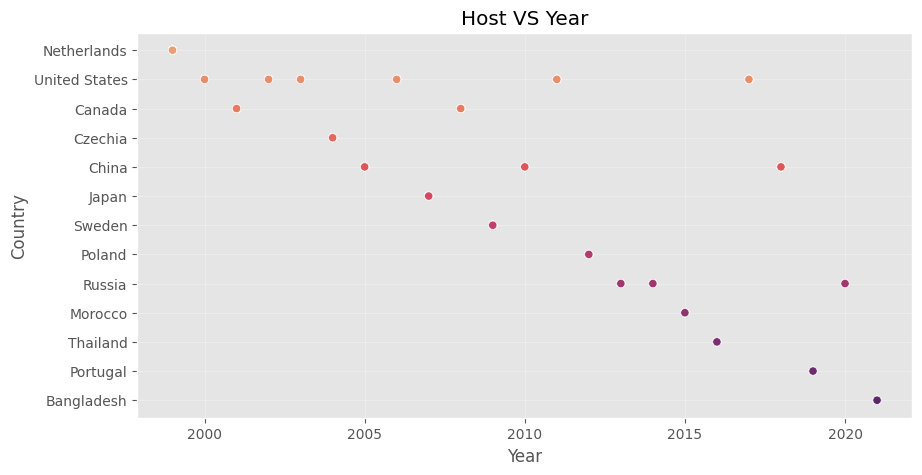

In [18]:
# Create a scatter plot to visualize the relationship between the year and the country that hosted the Olympic Games
plt.figure(figsize=(10,5))  # Set the size of the figure to 10 inches by 5 inches
plt.title('Host VS Year')  # Set the title of the plot to "Host VS Year"
plt.xlabel('Year')  # Set the label of the x-axis to "Year"
plt.ylabel('Country')  # Set the label of the y-axis to "Country"
plt.grid(alpha=0.3)
sns.scatterplot(data=df, x='Year', y='Host', hue=df.Host, legend=False, palette='flare');  # Use scatterplot() func to create a scatter plot.

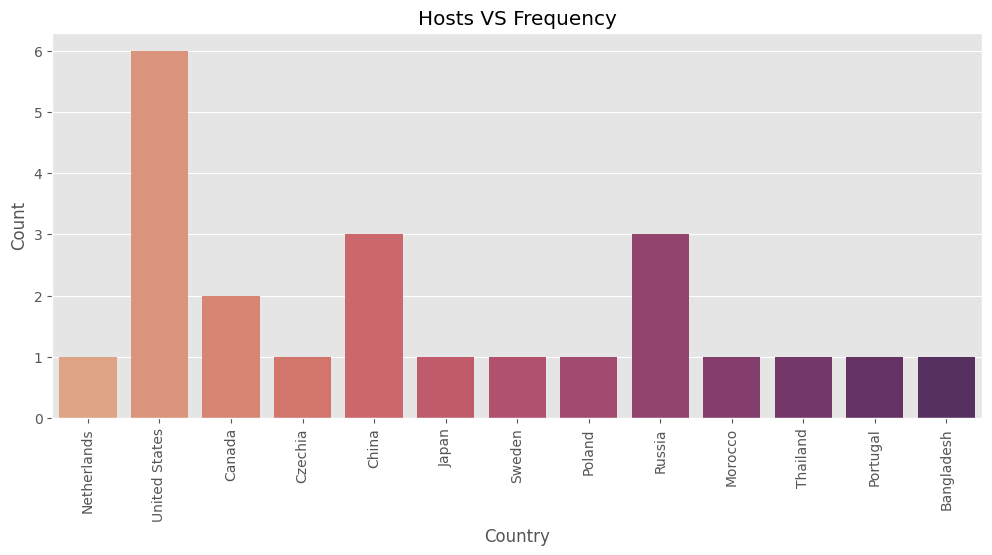

In [19]:
# barplot shows the count of countries hosts
fig, ax = plt.subplots(figsize=(12, 5)) # Set the size of the figure to 12 inches by 5 inches
ax.tick_params(axis='x', rotation=90) # rotate x-axis parameters
plt.title('Hosts VS Frequency') # Set the title of the plot to "Host VS Frequency"
plt.xlabel('Country') # Set the label of the x-axis to "Country"
plt.ylabel('Count') # Set the label of the Y-axis to "Count"
sns.barplot(x=list(country_year_map.keys()), y=list(country_year_map.values()), palette='flare'); # Use barplot() func to create a bar plot.

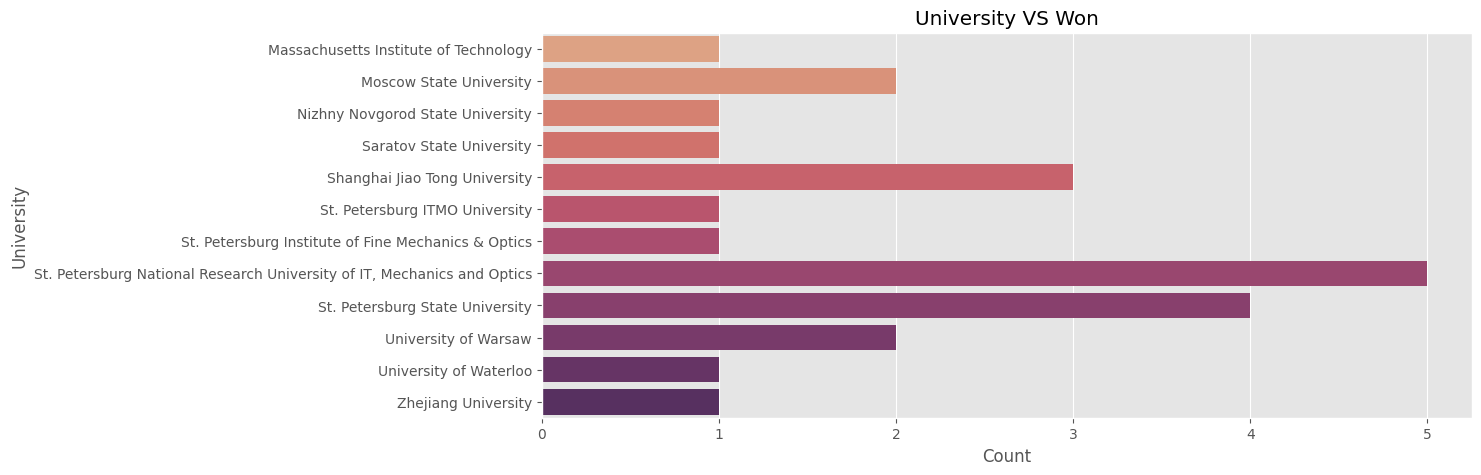

In [20]:
world_champs = df[df.Rank == 1] # select world champions by extracting data with rank == '1' 
univ_champs = world_champs.groupby('University').size().to_dict() # use groupby to count the num. of occurances of each university

plt.figure(figsize=(12,5)) # Set the size of the figure to 12 inches by 5 inches
plt.title('University VS Won') # Set the title of the plot to "University VS Won"
plt.ylabel('University') # Set the label of the Y-axis to "University"
plt.xlabel('Count') # Set the label of the x-axis to "Count"
sns.barplot(y=list(univ_champs.keys()), x=list(univ_champs.values()),orient='h', palette='flare');

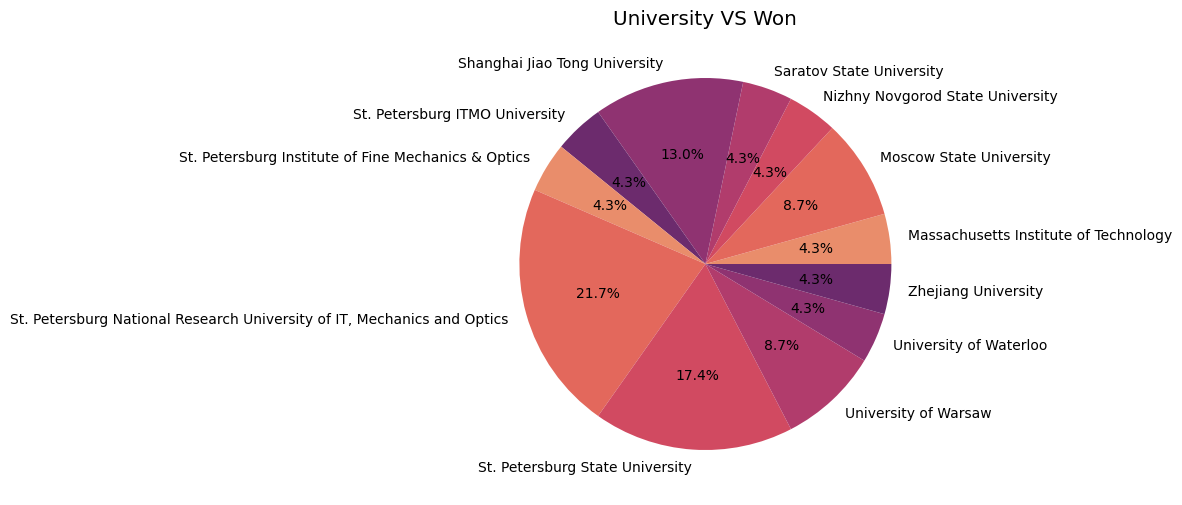

In [21]:
plt.figure(figsize=(6, 6)) # Set the size of the figure to 6 inches by 6 inches
plt.title('University VS Won') # Set the title of the plot to "University VS Won"
plt.axis('equal') # set X-axis and Y-axis to same value

# Create pie chart
plt.pie(list(univ_champs.values()), labels=list(univ_champs.keys()), autopct='%1.1f%%', colors=colors)

# Show plot
plt.show()


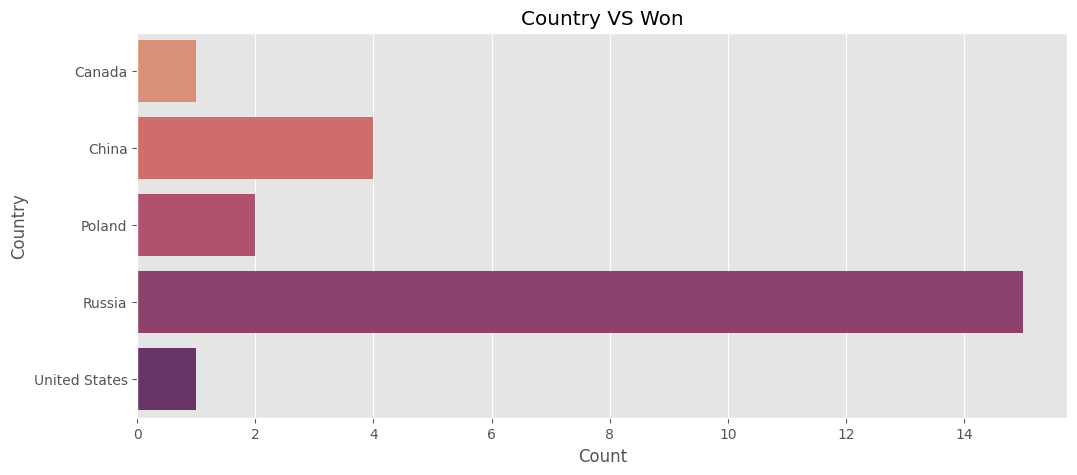

In [22]:
country_champs = world_champs.groupby('Country').size().to_dict() # use groupby to count the num. of occurances of each Country
plt.figure(figsize=(12,5)) # Set the size of the figure to 12 inches by 5 inches
plt.title('Country VS Won') # Set the title of the plot to "University VS Won"
plt.ylabel('Country') # Set the label of the Y-axis to "University"
plt.xlabel('Count') # Set the label of the x-axis to "Count"
sns.barplot(y=list(country_champs.keys()), x=list(country_champs.values()),orient='h', palette='flare');

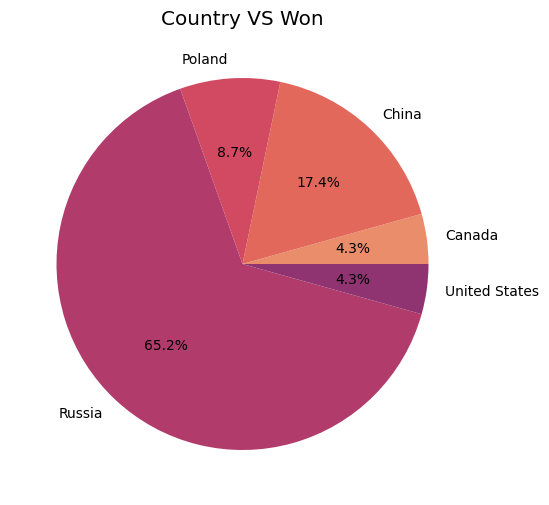

In [23]:
plt.figure(figsize=(6, 6)) # Set the size of the figure to 6 inches by 6 inches
plt.title('Country VS Won') # Set the title of the plot to "Country VS Won"
plt.axis('equal') # set X-axis and Y-axis to same value

# Create pie chart
plt.pie(list(country_champs.values()), labels=list(country_champs.keys()), autopct='%1.1f%%', colors=colors)

# Show plot
plt.show()


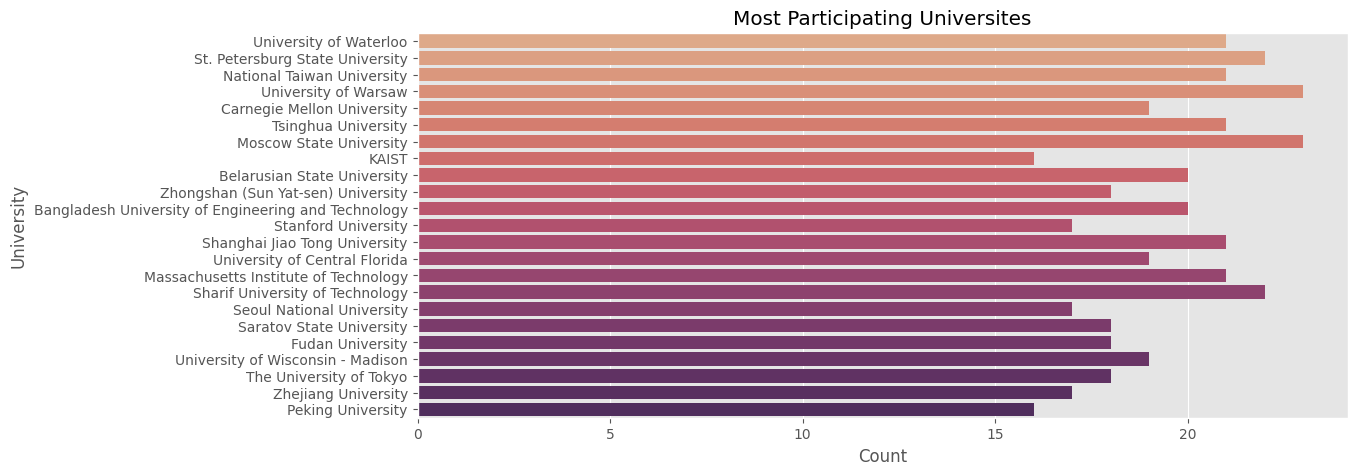

In [24]:
world_parti = df[df['Score'] >= 0] # select world participates by extracting data with score >= 0
univ_parti = Counter(world_parti['University']) # use groupby to count the num. of occurances of each university
most_parti = {k: v for k, v in univ_parti.items() if v > 15} # a dict to select universities participating more than 15 times

plt.figure(figsize=(12,5)) # Set the size of the figure to 12 inches by 5 inches
plt.title('Most Participating Universites') # Set the title of the plot to "University VS Won"
plt.ylabel('University') # Set the label of the Y-axis to "University"
plt.xlabel('Count') # Set the label of the x-axis to "Count"
sns.barplot(y=list(most_parti.keys()), x=list(most_parti.values()),orient='h', palette='flare');

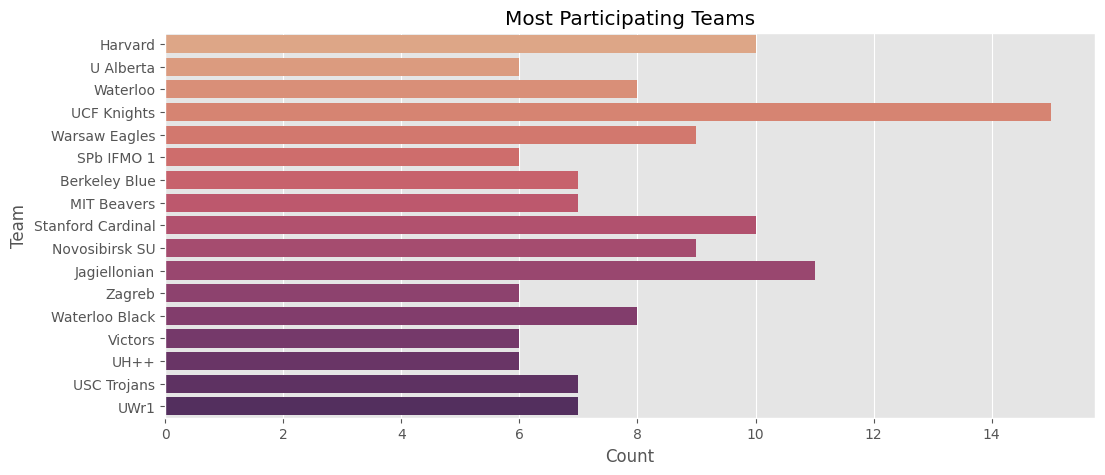

In [25]:
world_parti = df[df['Score'] >= 0] # select world particibates by extracting data with score >= 0
team_parti = Counter(world_parti['Team']) # use groupby to count the num. of occurances of each team
most_parti = {k: v for k, v in team_parti.items() if v > 5} # a dict to select universities participating more than 5 times

plt.figure(figsize=(12,5)) # Set the size of the figure to 12 inches by 5 inches
plt.title('Most Participating Teams') # Set the title of the plot to "University VS Won"
plt.ylabel('Team') # Set the label of the Y-axis to "University"
plt.xlabel('Count') # Set the label of the x-axis to "Count"
sns.barplot(y=list(most_parti.keys()), x=list(most_parti.values()),orient='h', palette='flare');

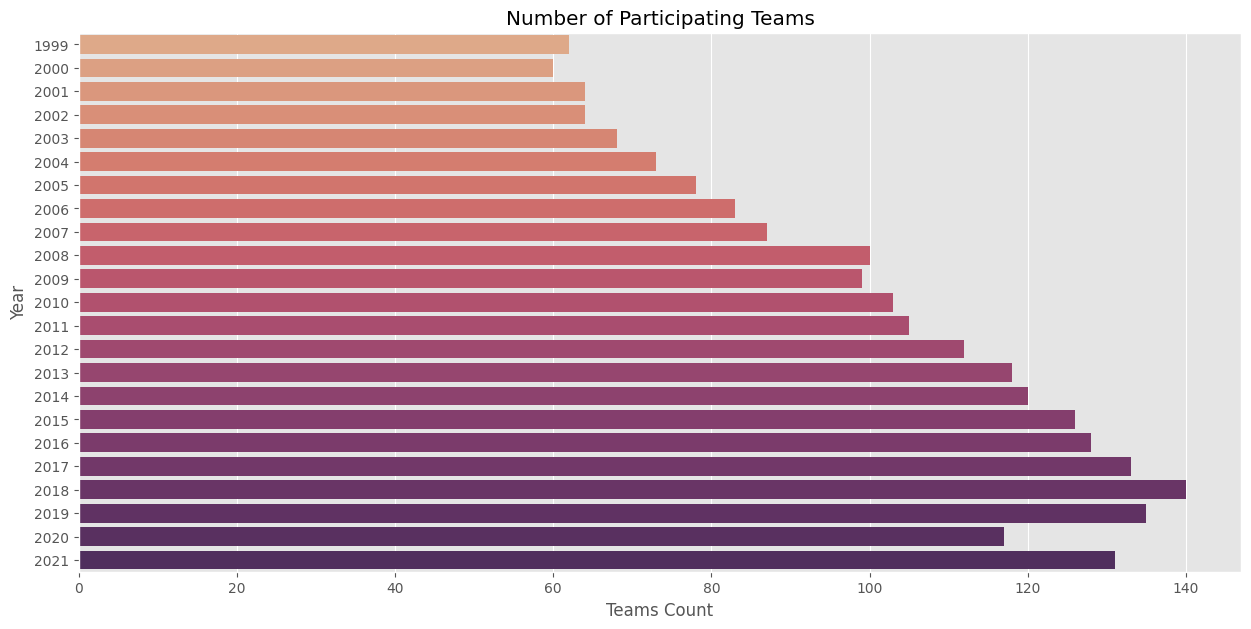

In [26]:
# show the number of teams participating every year
team_year_parti = df.groupby('Year').count()['Team'].to_dict() # grouping data by year to find the count of teams

plt.figure(figsize=(15,7)) # Set the size of the figure to 15 inches by 7 inches
plt.title('Number of Participating Teams') # Set the title of the plot to "Number of Participating Teams"
plt.ylabel('Year') # Set the label of the Y-axis to "Year"
plt.xlabel('Teams Count') # Set the label of the x-axis to "Teams Count"
sns.barplot(y=list(team_year_parti.keys()), x=list(team_year_parti.values()),orient='h', palette='flare');

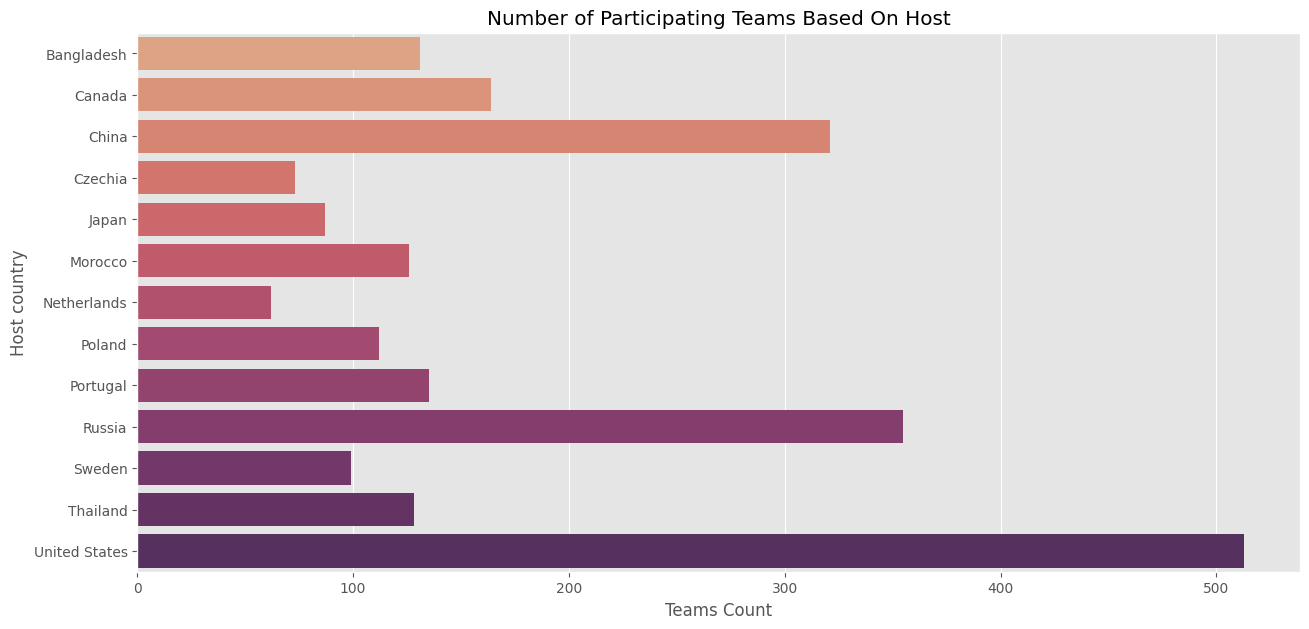

In [27]:
# show the number of teams participating based on host
team_host_parti = df.groupby('Host').count()['Team'].to_dict() # grouping data by Host to find the count of teams

plt.figure(figsize=(15,7)) # Set the size of the figure to 15 inches by 7 inches
plt.title('Number of Participating Teams Based On Host') # Set the title of the plot to "Number of Participating Teams"
plt.ylabel('Host country') # Set the label of the Y-axis to "Host country"
plt.xlabel('Teams Count') # Set the label of the x-axis to "Teams Count"
sns.barplot(y=list(team_host_parti.keys()), x=list(team_host_parti.values()),orient='h', palette='flare');

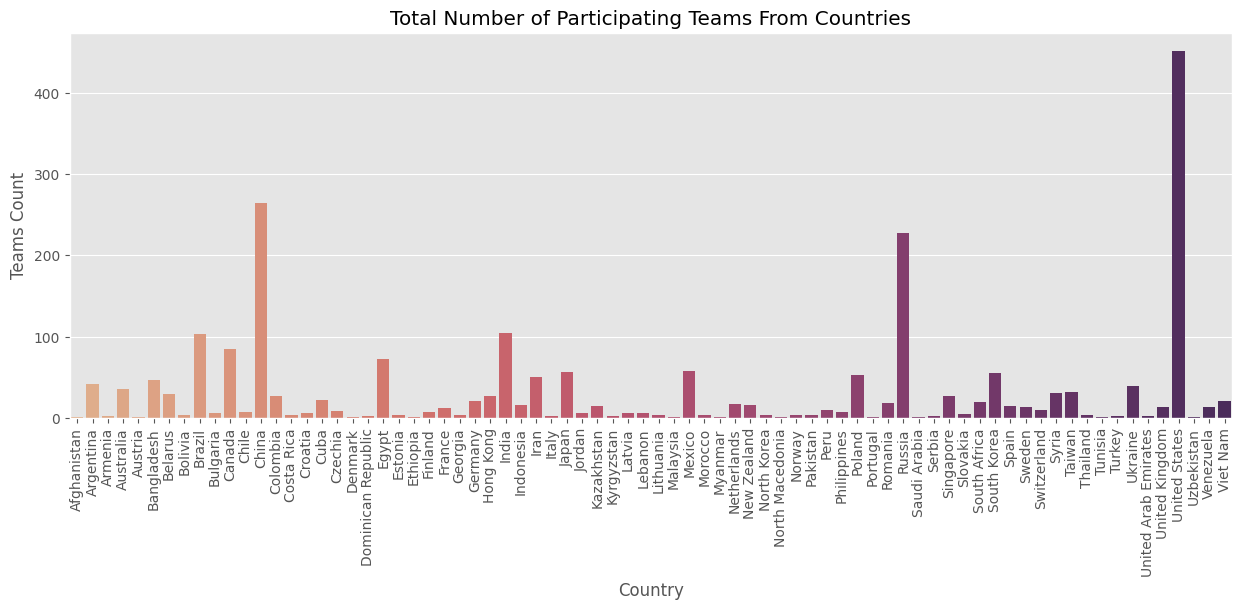

In [28]:
# show the number of teams participating form each country
team_country_parti = df.groupby('Country').count()['Team'].to_dict() # grouping data by year to find the count of teams

fig, ax = plt.subplots(figsize=(15, 5)) # Set the size of the figure to 15 inches by 7 inches
ax.tick_params(axis='x', rotation=90) # rotate x-axis parameters
plt.title('Total Number of Participating Teams From Countries') # Set the title of the plot to "Number of Participating Teams"
plt.xlabel('Country') # Set the label of the Y-axis to "Host country"
plt.ylabel('Teams Count') # Set the label of the x-axis to "Teams Count"
sns.barplot(x=list(team_country_parti.keys()), y=list(team_country_parti.values()), palette='flare');

**There may be a relation between the number of teams participating in the competition and the time the competition is hold or the host country**

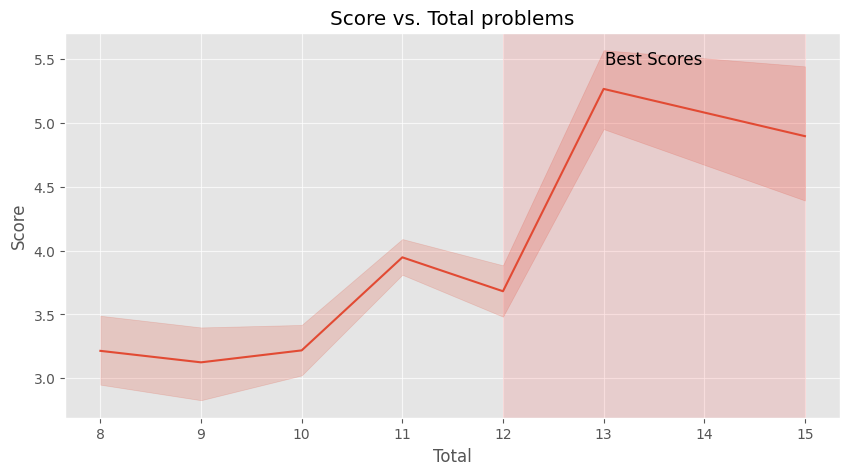

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Score vs. Total problems') # set title to 'Score vs. Total problems'
plt.grid(alpha=0.7)
sns.lineplot(data=df, x="Total", y="Score"); # use sns.lineplot func to draw a lineplot
ax.axvspan(12, 15, alpha=0.1, color='red')# Shade the range between x=3 and x=6
ax.text(13.5, 5.5, 'Best Scores', ha='center', va='center', fontsize=12, color='black');# Add text on the shaded region

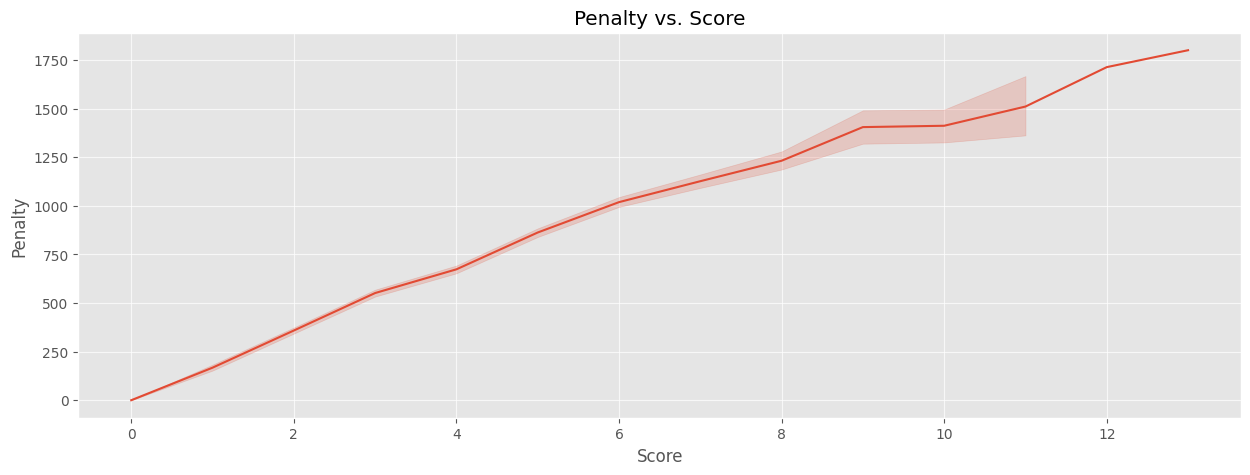

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Penalty vs. Score') # set title to 'Score vs. Penalty'
plt.grid(alpha=0.7)
sns.lineplot(data=df, x="Score", y="Penalty"); # use sns.lineplot func to draw a lineplot

### **Some Conclusions Based on Graphs**

1. **USA hosts the competition the most with `6` times**
1. **ST. Petersburg National Research Universoty is the most university to win the competition with `5` times `(21.7% of years)`**
1. **Russia is the most country to win the competition with `15` times `(65.2% of years)`**
1. **Most participated universities are `University of Warsaw` and `Moscow State University` with `23` times**
1. **Most participated team is `UCF Knights` with `15` times**
1. **In `2018` over `140` team participated the competition and this is the largest number over years**
1. **USA host has the most number of participating teams with over `500` team**
1. **USA Teams are the most participating teams in the competition with over `400` team over years**
1. **There may be a relation between the number of participating teams and the `host country` or the `time` the competition is hold**
1. **There may be a relation between `Scores` and the `Total number of problems` as from graph best scores are achieved when the total num. of problems is between `12` and `15`**

<a id='5'></a>
# ***5. Data Preparing / Preprocessing***

In [31]:
# year col is not important as we have date col which contains the year
# so we can drop year col and change date dtype to time
df.drop('Year', inplace=True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
# extract the day, month, and year into separate columns
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
# after extracting date we can drop the date col
df.drop('Date', inplace=True, axis=1)

In [33]:
# check duplicates
df.duplicated().sum()

0

In [34]:
df.isna().sum()

Host                   0
City                   0
Venue                  0
Rank                  43
University             0
Country                0
Team                   2
Contestant 1         400
Contestant 2         400
Contestant 3         401
Gold                   0
Silver                 0
Bronze                 0
Honorable              0
Score                 33
Total                  0
Score Percentage      33
Penalty              118
Prize               2168
day                    0
month                  0
year                   0
dtype: int64

**we can drop contestants cols as the contains to much nulls and doesn't provide valuable data**

In [35]:
# drop contestans cols
df.drop(['Contestant 1', 'Contestant 2', 'Contestant 3'], axis=1, inplace=True)

**We can also drop prize col**

In [36]:
# drop prize col
df.drop('Prize', axis=1, inplace=True)

In [37]:
# show data frame shape
df.shape

(2308, 18)

In [38]:
# fill NANs in score percentage and score with 0.0
# the value was determined after looking at data and observing that the rank of each team in these rows is in the end of rank
df['Score Percentage'].fillna(0.0, inplace=True)
df['Score'].fillna(0.0, inplace=True)

In [39]:
# create a dictionary where each unique score value is mapped to the average penalty value for that score group
# avg_penalty_null = df.groupby('Score').mean()['Penalty'].to_dict()
# fill in missing values in the 'Penalty' column using the average penalty value for the corresponding score value
# df['Penalty'] = df.apply(lambda x: avg_penalty_null[x['Score']] if pd.isna(x['Penalty']) else x['Penalty'], axis=1)

In [40]:
df.isna().sum()

Host                  0
City                  0
Venue                 0
Rank                 43
University            0
Country               0
Team                  2
Gold                  0
Silver                0
Bronze                0
Honorable             0
Score                 0
Total                 0
Score Percentage      0
Penalty             118
day                   0
month                 0
year                  0
dtype: int64

<Axes: xlabel='Score Percentage'>

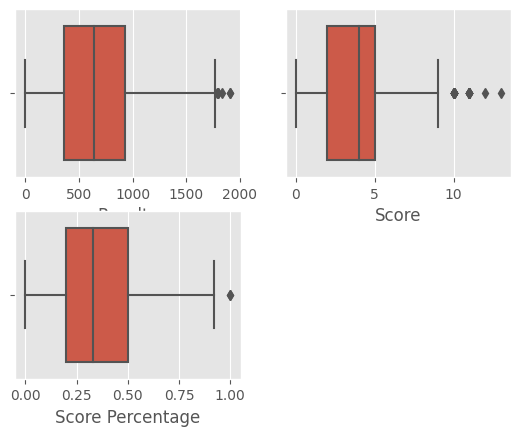

In [41]:
# check for outliers
plt.subplot(2,2,1)
sns.boxplot(data=df, x='Penalty')

plt.subplot(2,2,2)
sns.boxplot(data=df, x='Score')

plt.subplot(2,2,3)
sns.boxplot(data=df, x='Score Percentage')

**Their is no outliers that can affect the data extremely**

In [42]:
# Change binary columns to 0s and 1s
binary_cat = ['Gold',
              'Silver',
              'Bronze',
              'Honorable']
for cat in binary_cat:
  df[cat]=df[cat].astype(int)

In [43]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [52]:
# show data head after encodeing data
df = df.apply(lambda x: object_to_int(x))
df.head().T

,0,1,2,3,4
Host,6.00,6.00,6.00,6.00,6.00
City,4.00,4.00,4.00,4.00,4.00
Venue,2.00,2.00,2.00,2.00,2.00
Rank,1.00,2.00,3.00,4.00,5.00
University,522.00,8.00,319.00,448.00,74.00
Country,10.00,26.00,54.00,53.00,72.00
Team,1515.00,493.00,1298.00,1607.00,395.00
Gold,1.00,0.00,0.00,0.00,0.00
Silver,0.00,1.00,0.00,0.00,0.00
Bronze,0.00,0.00,1.00,1.00,1.00


### **Split data**

In [45]:
# # split data and determine the target of predection to be if the team will acheive a gold medal or no
X = df.drop('Gold', axis=1)
y = df['Gold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42) # split data with 65/35 to train data and test data
X_train = X_train.dropna(how='any', axis=1)
X_test = X_test.dropna(how='any', axis=1)

<a id='6'></a>
# ***6. Modeling***

## **Train model**

In [46]:
# # Train and fit the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **Predict**

In [47]:
# pred = model.predict(X_test)
# pred

y_pred = rf_model.predict(X_test)

In [48]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
# To find the probability (soft predictions)
rf_model.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

<a id='7'></a>
# ***7. Evaluation***

In [50]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [51]:
print("Accuracy:", accuracy)
print("Confusion matrix:")
print(confusion_mat)

Accuracy: 0.9925742574257426
Confusion matrix:
[[774   1]
 [  5  28]]
